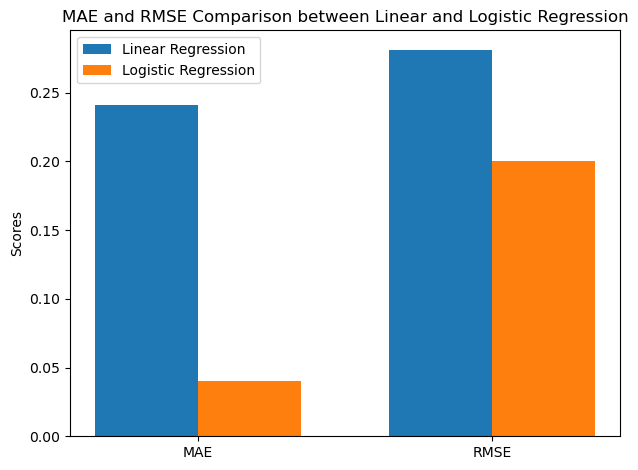

Linear Regression - MAE:  0.24094981830426165  RMSE:  0.28135722936415486
Logistic Regression - MAE:  0.04  RMSE:  0.2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)                # Age of students (18-30 years old)
hours_of_study = np.random.randint(1, 10, size=n_samples)       # Hours of study per week (1-10 hours)
previous_scores = np.random.randint(50, 100, size=n_samples)    # Average previous test scores (50-100)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)  # Pass/Fail (0 or 1)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

# 2. Define input and output
X = data[['Age', 'Hours of Study', 'Previous Test Scores']]
y = data['Pass/Fail']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 4. Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# 5. Calculate MAE and RMSE for both models
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

mae_logistic = mean_absolute_error(y_test, y_pred_logistic)
rmse_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))

# 6. Plot comparison of MAE and RMSE
labels = ['MAE', 'RMSE']
linear_scores = [mae_linear, rmse_linear]
logistic_scores = [mae_logistic, rmse_logistic]

x = np.arange(len(labels))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, linear_scores, width, label='Linear Regression')
rects2 = ax.bar(x + width/2, logistic_scores, width, label='Logistic Regression')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('MAE and RMSE Comparison between Linear and Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Print the MAE and RMSE
print("Linear Regression - MAE: ", mae_linear, " RMSE: ", rmse_linear)
print("Logistic Regression - MAE: ", mae_logistic, " RMSE: ", rmse_logistic)


Linear Regression - MAE: 0.2409, RMSE: 0.2814
Logistic Regression - MAE: 0.0400, RMSE: 0.2000
CNN - MAE: 0.7450, RMSE: 0.8631
RNN - MAE: 0.7450, RMSE: 0.8631


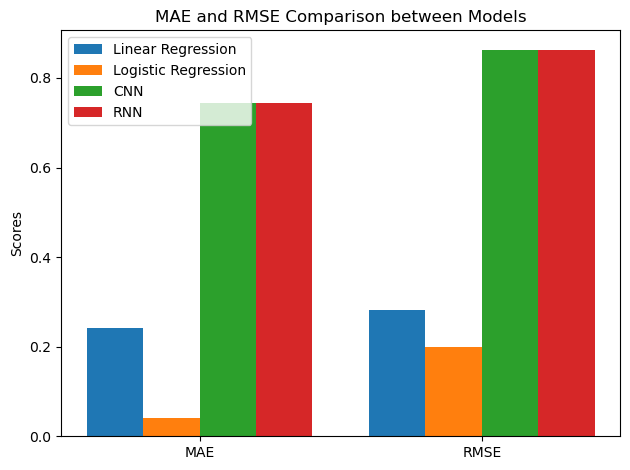

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)                # Age of students (18-30 years old)
hours_of_study = np.random.randint(1, 10, size=n_samples)       # Hours of study per week (1-10 hours)
previous_scores = np.random.randint(50, 100, size=n_samples)    # Average previous test scores (50-100)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)  # Pass/Fail (0 or 1)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

# 2. Define input and output
X = data[['Age', 'Hours of Study', 'Previous Test Scores']].values
y = data['Pass/Fail'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 4. Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# 5. CNN Model (using TensorFlow without Keras)
X_cnn_train = X_train.reshape(-1, 1, 3, 1)  # reshape for CNN (batch, height=1, width=3, channels=1)
X_cnn_test = X_test.reshape(-1, 1, 3, 1)

# CNN model parameters
cnn_weights = {
    'conv1': tf.Variable(tf.random.normal([1, 2, 1, 16])),  # filter shape: [height, width, in_channels, out_channels]
    'dense': tf.Variable(tf.random.normal([16 * 2, 1]))  # Flatten and Dense layer weights
}
cnn_biases = {
    'conv1': tf.Variable(tf.zeros([16])),
    'dense': tf.Variable(tf.zeros([1]))
}

# CNN model
def cnn_model(X):
    conv1 = tf.nn.conv2d(X, cnn_weights['conv1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.relu(conv1 + cnn_biases['conv1'])
    conv1_flat = tf.reshape(conv1, [-1, 16 * 2])
    dense = tf.matmul(conv1_flat, cnn_weights['dense']) + cnn_biases['dense']
    output = tf.nn.sigmoid(dense)
    return output

# CNN training loop
optimizer_cnn = tf.optimizers.Adam()
loss_fn_cnn = tf.losses.BinaryCrossentropy()

for epoch in range(10):
    with tf.GradientTape() as tape:
        predictions = cnn_model(X_cnn_train)
        loss_value = loss_fn_cnn(y_train.reshape(-1, 1).astype(float), predictions)
    gradients = tape.gradient(loss_value, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']])
    optimizer_cnn.apply_gradients(zip(gradients, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']]))

y_pred_cnn = cnn_model(X_cnn_test).numpy().flatten()
y_pred_cnn = np.round(y_pred_cnn)

# 6. RNN Model (using TensorFlow without Keras)
X_rnn_train = X_train.reshape(-1, 3, 1)  # reshape for RNN (batch, timesteps=3, features=1)
X_rnn_test = X_test.reshape(-1, 3, 1)

# RNN model parameters
rnn_weights = {
    'rnn': tf.Variable(tf.random.normal([1, 16])),  # SimpleRNN cell weights
    'dense': tf.Variable(tf.random.normal([16, 1]))  # Dense layer weights
}
rnn_biases = {
    'rnn': tf.Variable(tf.zeros([16])),
    'dense': tf.Variable(tf.zeros([1]))
}

# RNN model
def rnn_model(X):
    rnn_outputs = []
    for t in range(3):  # Iterate over each timestep
        rnn_input = X[:, t, :] @ rnn_weights['rnn'] + rnn_biases['rnn']
        rnn_outputs.append(tf.nn.relu(rnn_input))
    rnn_output = rnn_outputs[-1]  # Last timestep output
    dense = tf.matmul(rnn_output, rnn_weights['dense']) + rnn_biases['dense']
    output = tf.nn.sigmoid(dense)
    return output

# RNN training loop
optimizer_rnn = tf.optimizers.Adam()
loss_fn_rnn = tf.losses.BinaryCrossentropy()

for epoch in range(10):
    with tf.GradientTape() as tape:
        predictions = rnn_model(X_rnn_train)
        loss_value = loss_fn_rnn(y_train.reshape(-1, 1).astype(float), predictions)
    gradients = tape.gradient(loss_value, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']])
    optimizer_rnn.apply_gradients(zip(gradients, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']]))

y_pred_rnn = rnn_model(X_rnn_test).numpy().flatten()
y_pred_rnn = np.round(y_pred_rnn)

# 7. Evaluation: Calculate MAE and RMSE for all models
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f'{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}')
    return mae, rmse

mae_linear, rmse_linear = calculate_metrics(y_test, y_pred_linear, 'Linear Regression')
mae_logistic, rmse_logistic = calculate_metrics(y_test, y_pred_logistic, 'Logistic Regression')
mae_cnn, rmse_cnn = calculate_metrics(y_test, y_pred_cnn, 'CNN')
mae_rnn, rmse_rnn = calculate_metrics(y_test, y_pred_rnn, 'RNN')

# 8. Plot comparison of MAE and RMSE
labels = ['MAE', 'RMSE']
linear_scores = [mae_linear, rmse_linear]
logistic_scores = [mae_logistic, rmse_logistic]
cnn_scores = [mae_cnn, rmse_cnn]
rnn_scores = [mae_rnn, rmse_rnn]

x = np.arange(len(labels))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5 * width, linear_scores, width, label='Linear Regression')
rects2 = ax.bar(x - 0.5 * width, logistic_scores, width, label='Logistic Regression')
rects3 = ax.bar(x + 0.5 * width, cnn_scores, width, label='CNN')
rects4 = ax.bar(x + 1.5 * width, rnn_scores, width, label='RNN')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('MAE and RMSE Comparison between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tkinter as tk
from tkinter import messagebox

# 1. Generate synthetic data
np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 30, size=n_samples)                # Age of students (18-30 years old)
hours_of_study = np.random.randint(1, 10, size=n_samples)       # Hours of study per week (1-10 hours)
previous_scores = np.random.randint(50, 100, size=n_samples)    # Average previous test scores (50-100)
pass_fail = (hours_of_study * previous_scores / 100 + np.random.randn(n_samples) * 0.1 > 5).astype(int)  # Pass/Fail (0 or 1)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Hours of Study': hours_of_study,
    'Previous Test Scores': previous_scores,
    'Pass/Fail': pass_fail
})

# 2. Define input and output
X = data[['Age', 'Hours of Study', 'Previous Test Scores']].values
y = data['Pass/Fail'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# CNN Model (using TensorFlow without Keras)
def cnn_model(X_train, y_train, X_test):
    X_cnn_train = X_train.reshape(-1, 1, 3, 1)  # reshape for CNN
    X_cnn_test = X_test.reshape(-1, 1, 3, 1)

    cnn_weights = {
        'conv1': tf.Variable(tf.random.normal([1, 2, 1, 16])),
        'dense': tf.Variable(tf.random.normal([16 * 2, 1]))
    }
    cnn_biases = {
        'conv1': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def cnn_forward(X):
        conv1 = tf.nn.conv2d(X, cnn_weights['conv1'], strides=[1, 1, 1, 1], padding='VALID')
        conv1 = tf.nn.relu(conv1 + cnn_biases['conv1'])
        conv1_flat = tf.reshape(conv1, [-1, 16 * 2])
        dense = tf.matmul(conv1_flat, cnn_weights['dense']) + cnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_cnn = tf.optimizers.Adam()
    loss_fn_cnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = cnn_forward(X_cnn_train)
            loss_value = loss_fn_cnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']])
        optimizer_cnn.apply_gradients(zip(gradients, [cnn_weights['conv1'], cnn_weights['dense'], cnn_biases['conv1'], cnn_biases['dense']]))

    y_pred_cnn = cnn_forward(X_cnn_test).numpy().flatten()
    return np.round(y_pred_cnn)

# RNN Model (using TensorFlow without Keras)
def rnn_model(X_train, y_train, X_test):
    X_rnn_train = X_train.reshape(-1, 3, 1)
    X_rnn_test = X_test.reshape(-1, 3, 1)

    rnn_weights = {
        'rnn': tf.Variable(tf.random.normal([1, 16])),
        'dense': tf.Variable(tf.random.normal([16, 1]))
    }
    rnn_biases = {
        'rnn': tf.Variable(tf.zeros([16])),
        'dense': tf.Variable(tf.zeros([1]))
    }

    def rnn_forward(X):
        rnn_outputs = []
        for t in range(3):
            rnn_input = X[:, t, :] @ rnn_weights['rnn'] + rnn_biases['rnn']
            rnn_outputs.append(tf.nn.relu(rnn_input))
        rnn_output = rnn_outputs[-1]
        dense = tf.matmul(rnn_output, rnn_weights['dense']) + rnn_biases['dense']
        output = tf.nn.sigmoid(dense)
        return output

    optimizer_rnn = tf.optimizers.Adam()
    loss_fn_rnn = tf.losses.BinaryCrossentropy()

    for epoch in range(10):
        with tf.GradientTape() as tape:
            predictions = rnn_forward(X_rnn_train)
            loss_value = loss_fn_rnn(y_train.reshape(-1, 1).astype(float), predictions)
        gradients = tape.gradient(loss_value, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']])
        optimizer_rnn.apply_gradients(zip(gradients, [rnn_weights['rnn'], rnn_weights['dense'], rnn_biases['rnn'], rnn_biases['dense']]))

    y_pred_rnn = rnn_forward(X_rnn_test).numpy().flatten()
    return np.round(y_pred_rnn)

# Function to plot MAE and RMSE comparison
def plot_comparison():
    mae_linear, rmse_linear = calculate_metrics(y_test, linear_model.predict(X_test), 'Linear Regression')
    mae_logistic, rmse_logistic = calculate_metrics(y_test, logistic_model.predict(X_test), 'Logistic Regression')
    mae_cnn, rmse_cnn = calculate_metrics(y_test, cnn_model(X_train, y_train, X_test), 'CNN')
    mae_rnn, rmse_rnn = calculate_metrics(y_test, rnn_model(X_train, y_train, X_test), 'RNN')

    labels = ['MAE', 'RMSE']
    linear_scores = [mae_linear, rmse_linear]
    logistic_scores = [mae_logistic, rmse_logistic]
    cnn_scores = [mae_cnn, rmse_cnn]
    rnn_scores = [mae_rnn, rmse_rnn]

    x = np.arange(len(labels))  # label locations
    width = 0.2  # bar width

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 1.5 * width, linear_scores, width, label='Linear Regression')
    rects2 = ax.bar(x - 0.5 * width, logistic_scores, width, label='Logistic Regression')
    rects3 = ax.bar(x + 0.5 * width, cnn_scores, width, label='CNN')
    rects4 = ax.bar(x + 1.5 * width, rnn_scores, width, label='RNN')

    ax.set_ylabel('Scores')
    ax.set_title('MAE and RMSE Comparison between Models')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Function to calculate MAE and RMSE
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Tkinter GUI setup
def predict():
    try:
        age_input = int(entry_age.get())
        hours_input = int(entry_hours.get())
        scores_input = int(entry_scores.get())
    except ValueError:
        messagebox.showerror("Invalid input", "Please enter valid integers for Age, Hours of Study, and Test Scores")
        return

    user_input = np.array([[age_input, hours_input, scores_input]])

    # Select model
    selected_model = model_var.get()
    if selected_model == "Linear Regression":
        prediction = linear_model.predict(user_input)
    elif selected_model == "Logistic Regression":
        prediction = logistic_model.predict(user_input)
    elif selected_model == "CNN":
        prediction = cnn_model(X_train, y_train, user_input)
    elif selected_model == "RNN":
        prediction = rnn_model(X_train, y_train, user_input)
    else:
        messagebox.showerror("Error", "Please select a model")
        return

    prediction_label = "Pass" if np.round(prediction)[0] == 1 else "Fail"
    messagebox.showinfo("Prediction Result", f"Prediction: {prediction_label}")

# Main window
root = tk.Tk()
root.title("Machine Learning Model Selector")

# Age input
label_age = tk.Label(root, text="Age:")
label_age.pack()
entry_age = tk.Entry(root)
entry_age.pack()

# Hours of Study input
label_hours = tk.Label(root, text="Hours of Study:")
label_hours.pack()
entry_hours = tk.Entry(root)
entry_hours.pack()

# Previous Test Scores input
label_scores = tk.Label(root, text="Previous Test Scores:")
label_scores.pack()
entry_scores = tk.Entry(root)
entry_scores.pack()

# Model selection
model_var = tk.StringVar(root)
model_var.set("Select Model")  # Default value
model_options = ["Linear Regression", "Logistic Regression", "CNN", "RNN"]
model_menu = tk.OptionMenu(root, model_var, *model_options)
model_menu.pack()

# Predict button
button_predict = tk.Button(root, text="Predict", command=predict)
button_predict.pack()

# Button to display comparison plot
button_plot = tk.Button(root, text="Show MAE/RMSE Comparison", command=plot_comparison)
button_plot.pack()

# Start the GUI loop
root.mainloop()
